<a href="https://colab.research.google.com/github/SDog6/FruitPunchAIClassificationProject/blob/main/FinalPoachersDataNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing dependacies

In [ ]:
!pip install pylabel > /dev/null

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from google.colab import drive
import cv2
from tqdm import tqdm
import os
import glob
from PIL import Image
from numpy import asarray
from pylabel import importer

## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing data 

In [ ]:
#Specify path to the coco.json file
path_to_annotations = "/content/drive/MyDrive/annotations/instances_train.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "/content/drive/MyDrive/images/train"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df


,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/drive/MyDrive/images/train,video53_1_000123.PNG,,124,640,470,,,317.53,1.16,...,[],0,,,,1,Human,,,1
1,/content/drive/MyDrive/images/train,video53_1_000124.PNG,,125,640,470,,,318.30,2.03,...,[],0,,,,1,Human,,,1
2,/content/drive/MyDrive/images/train,video53_1_000125.PNG,,126,640,470,,,319.08,2.90,...,[],0,,,,1,Human,,,1
3,/content/drive/MyDrive/images/train,video53_1_000126.PNG,,127,640,470,,,319.85,3.77,...,[],0,,,,1,Human,,,1
4,/content/drive/MyDrive/images/train,video53_1_000127.PNG,,128,640,470,,,320.08,4.24,...,[],0,,,,1,Human,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34193,/content/drive/MyDrive/images/train,video78_1_001153.PNG,,29687,640,470,,,282.53,458.41,...,[],0,,,,1,Human,,,1
34194,/content/drive/MyDrive/images/train,video78_1_001154.PNG,,29688,640,470,,,282.82,460.10,...,[],0,,,,1,Human,,,1
34195,/content/drive/MyDrive/images/train,video78_1_001155.PNG,,29689,640,470,,,283.32,461.90,...,[],0,,,,1,Human,,,1


## Converting data from COCO JSON to YOLO and XML format

In [ ]:
dataset.path_to_annotations = "data/yolo"

In [ ]:
dataset.export.ExportToYoloV5()

In [ ]:
dataset.path_to_annotations = "data/XML"

In [ ]:
dataset.export.ExportToVoc()

In [ ]:
dataset.df

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/drive/MyDrive/images/train,video53_1_000123.PNG,,124,640,470,,,317.53,1.16,...,[],0,,,,1,Human,,,1
1,/content/drive/MyDrive/images/train,video53_1_000124.PNG,,125,640,470,,,318.30,2.03,...,[],0,,,,1,Human,,,1
2,/content/drive/MyDrive/images/train,video53_1_000125.PNG,,126,640,470,,,319.08,2.90,...,[],0,,,,1,Human,,,1
3,/content/drive/MyDrive/images/train,video53_1_000126.PNG,,127,640,470,,,319.85,3.77,...,[],0,,,,1,Human,,,1
4,/content/drive/MyDrive/images/train,video53_1_000127.PNG,,128,640,470,,,320.08,4.24,...,[],0,,,,1,Human,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34193,/content/drive/MyDrive/images/train,video78_1_001153.PNG,,29687,640,470,,,282.53,458.41,...,[],0,,,,1,Human,,,1
34194,/content/drive/MyDrive/images/train,video78_1_001154.PNG,,29688,640,470,,,282.82,460.10,...,[],0,,,,1,Human,,,1
34195,/content/drive/MyDrive/images/train,video78_1_001155.PNG,,29689,640,470,,,283.32,461.90,...,[],0,,,,1,Human,,,1


## Making a dataframe with only the needed information from the XML files

In [ ]:
from xml.etree import ElementTree
#In this variable we're going to make a bunch of empty that we're going to fill with the annotation data.
information = {'File': [],'AnnotationFile': [],'width': [], 'height': [], 'xmin': [], 'xmax': [], 'ymin': [], 'ymax': [], 'name': []}

#We're going to use the default glob module that comes pre-install with phyton to import the annotation file.
#With the ElementTree module we're going to go through and read each anotation file.
annotationDir = "/content/data/XML"
for annotation in tqdm(glob.glob(annotationDir + '/*.xml')):
    tree = ElementTree.parse(annotation)
    
    #Every XML file is made out of elements, and our XML files are made out of: 1 size element and 1 or more object element(s).
    for element in tree.iter():
        #The size element will tell us about the width and height of the picture.
        if 'size' in element.tag:
            #Here we loop through to each attribute in the element and we take only the width and the height.
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = round(float(attribute.text))
                if 'height' in attribute.tag:
                    height = round(float(attribute.text))

        #The object element(s) represent the labeled face(s) in the specific image that is connected to the xml file.           
        if 'object' in element.tag:
            for attribute in list(element):
                #The name atribute is the actual lable of a specific face, telling us whether the face is wearing,
                #not wearing or weariing incorrectly a mask.
                if 'name' in attribute.tag:
                    name = attribute.text 
                    #The reason I did this line of code because when reading some images,the slashes in the path sometimes
                    #incorrectly get revesed e.g. ('/data/input/face-mask-detection' becomes /data\input/face-mask-detection).
                    newPath = annotation.replace(os.sep, '/')
                    #Here we will add the information that we have such as label, width, height, and the file name to the arrays.
                    information['name'] += [name]
                    information['width'] += [width]
                    information['height'] += [height]
                    information['File'] += [newPath.split('/')[-1][0:-4]]  
                    information['AnnotationFile'] += [annotation.split('/')[-1][0:-4]]


                
                #The bndbox (bounding box) attribute contains 2 longitudes and 2 latitudes that draw an outline around the face.
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = round(float(dimension.text))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = round(float(dimension.text))
                            information['ymin'] += [ymin]                               
                        if 'xmax' in dimension.tag:
                            xmax = round(float(dimension.text))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = round(float(dimension.text))
                            information['ymax'] += [ymax]

100%|██████████| 13111/13111 [00:01<00:00, 12406.76it/s]


In [ ]:
annotations_info_df = pd.DataFrame(information)
annotations_info_df

,File,AnnotationFile,width,height,xmin,xmax,ymin,ymax,name
0,video53_2_001659,video53_2_001659,640,470,594,604,225,233,Human
1,video53_2_001852,video53_2_001852,640,470,522,533,45,52,Human
2,videobh_42_000050,videobh_42_000050,640,470,500,503,28,36,Human
3,videobh_42_000050,videobh_42_000050,640,470,497,501,24,31,Human
4,video53_1_000556,video53_1_000556,640,470,88,94,105,114,Human
...,...,...,...,...,...,...,...,...,...
34193,videobh_1_001066,videobh_1_001066,640,470,260,275,106,129,Human
34194,videobh_1_001066,videobh_1_001066,640,470,297,311,132,154,Human
34195,videobh_1_001066,videobh_1_001066,640,470,266,281,176,192,Human
34196,videobh_1_001066,videobh_1_001066,640,470,246,260,160,176,Human


In [ ]:
annotations_info_df['AnnotationFile'] = annotations_info_df['AnnotationFile'] + '.xml'
annotations_info_df['ImageFile'] = annotations_info_df['File'] + '.PNG'

annotations_info_df

,File,AnnotationFile,width,height,xmin,xmax,ymin,ymax,name,ImageFile
0,video53_2_001659,video53_2_001659.xml,640,470,594,604,225,233,Human,video53_2_001659.PNG
1,video53_2_001852,video53_2_001852.xml,640,470,522,533,45,52,Human,video53_2_001852.PNG
2,videobh_42_000050,videobh_42_000050.xml,640,470,500,503,28,36,Human,videobh_42_000050.PNG
3,videobh_42_000050,videobh_42_000050.xml,640,470,497,501,24,31,Human,videobh_42_000050.PNG
4,video53_1_000556,video53_1_000556.xml,640,470,88,94,105,114,Human,video53_1_000556.PNG
...,...,...,...,...,...,...,...,...,...,...
34193,videobh_1_001066,videobh_1_001066.xml,640,470,260,275,106,129,Human,videobh_1_001066.PNG
34194,videobh_1_001066,videobh_1_001066.xml,640,470,297,311,132,154,Human,videobh_1_001066.PNG
34195,videobh_1_001066,videobh_1_001066.xml,640,470,266,281,176,192,Human,videobh_1_001066.PNG
34196,videobh_1_001066,videobh_1_001066.xml,640,470,246,260,160,176,Human,videobh_1_001066.PNG


In [ ]:
annotations_info_df['cropped_image_file'] = annotations_info_df['File']
annotations_info_df

,File,AnnotationFile,width,height,xmin,xmax,ymin,ymax,name,ImageFile,cropped_image_file
0,video53_2_001659,video53_2_001659.xml,640,470,594,604,225,233,Human,video53_2_001659.PNG,video53_2_001659
1,video53_2_001852,video53_2_001852.xml,640,470,522,533,45,52,Human,video53_2_001852.PNG,video53_2_001852
2,videobh_42_000050,videobh_42_000050.xml,640,470,500,503,28,36,Human,videobh_42_000050.PNG,videobh_42_000050
3,videobh_42_000050,videobh_42_000050.xml,640,470,497,501,24,31,Human,videobh_42_000050.PNG,videobh_42_000050
4,video53_1_000556,video53_1_000556.xml,640,470,88,94,105,114,Human,video53_1_000556.PNG,video53_1_000556
...,...,...,...,...,...,...,...,...,...,...,...
34193,videobh_1_001066,videobh_1_001066.xml,640,470,260,275,106,129,Human,videobh_1_001066.PNG,videobh_1_001066
34194,videobh_1_001066,videobh_1_001066.xml,640,470,297,311,132,154,Human,videobh_1_001066.PNG,videobh_1_001066
34195,videobh_1_001066,videobh_1_001066.xml,640,470,266,281,176,192,Human,videobh_1_001066.PNG,videobh_1_001066
34196,videobh_1_001066,videobh_1_001066.xml,640,470,246,260,160,176,Human,videobh_1_001066.PNG,videobh_1_001066


## Checking for missing values

In [ ]:
#missing values check for x 
x_annotation = annotations_info_df[(annotations_info_df["xmin"]==0) & (annotations_info_df["xmax"]==0)]
x_annotation.value_counts().sum() 

2

In [ ]:
#missing values check for y
y_annotation = annotations_info_df[(annotations_info_df["ymin"]==0) & (annotations_info_df["ymax"]==0)]
y_annotation.value_counts().sum() 

14

## Plotting the xmin and ymin coordinates

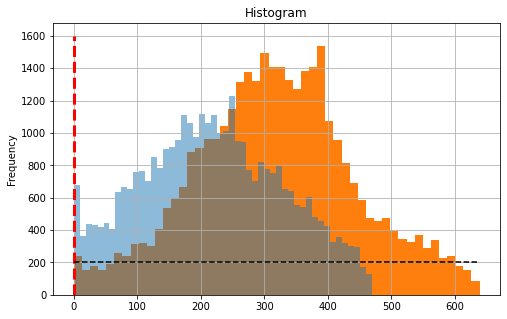

In [ ]:
#visual check-up 
import pylab as pyl
from matplotlib import pyplot as plt
#img size
fig=plt.figure(figsize=(8,5))
line = 0

#first hist
annotations_info_df['xmin'].hist(bins=50,color = "tab:orange")
annotations_info_df['ymin'].hist(bins=50,color = "tab:blue", alpha=0.5)
plt.vlines(0,0,1600,linestyle='dashed',colors='red', linewidth=3)
plt.hlines(200,0,635,linestyle='dashed')
plt.ylabel ('Frequency') 
plt.title ('Histogram') 
pyl.show()

## Plotting xmin xmax ymin ymax coordinates

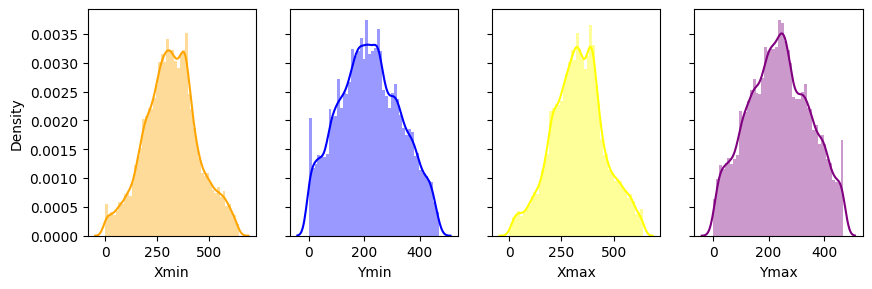

In [ ]:
import warnings
#essential additions
warnings.filterwarnings("ignore")
#second option
x1 = annotations_info_df['xmin']
y1 = annotations_info_df['ymin']
x2 = annotations_info_df['xmax']
y2 = annotations_info_df['ymax']

# plot
fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="orange", ax=axes[0], axlabel='Xmin')
sns.distplot(y1 , color="blue", ax=axes[1], axlabel='Ymin')
sns.distplot(x2, color="yellow", ax=axes[2], axlabel='Xmax')
sns.distplot(y2, color="purple", ax=axes[3], axlabel='Ymax')

## Making dataframe with no missing data

In [ ]:
#solution
ImagesRemovedErrors = annotations_info_df[(annotations_info_df["xmin"]!=0) & (annotations_info_df["xmax"]!=0)]
ImagesRemovedErrors = ImagesRemovedErrors[(ImagesRemovedErrors["ymin"]!=0) & (ImagesRemovedErrors["ymax"]!=0)]
ImagesRemovedErrors

,File,AnnotationFile,width,height,xmin,xmax,ymin,ymax,name,ImageFile,cropped_image_file
0,video53_2_001659,video53_2_001659.xml,640,470,594,604,225,233,Human,video53_2_001659.PNG,video53_2_001659
1,video53_2_001852,video53_2_001852.xml,640,470,522,533,45,52,Human,video53_2_001852.PNG,video53_2_001852
2,videobh_42_000050,videobh_42_000050.xml,640,470,500,503,28,36,Human,videobh_42_000050.PNG,videobh_42_000050
3,videobh_42_000050,videobh_42_000050.xml,640,470,497,501,24,31,Human,videobh_42_000050.PNG,videobh_42_000050
4,video53_1_000556,video53_1_000556.xml,640,470,88,94,105,114,Human,video53_1_000556.PNG,video53_1_000556
...,...,...,...,...,...,...,...,...,...,...,...
34193,videobh_1_001066,videobh_1_001066.xml,640,470,260,275,106,129,Human,videobh_1_001066.PNG,videobh_1_001066
34194,videobh_1_001066,videobh_1_001066.xml,640,470,297,311,132,154,Human,videobh_1_001066.PNG,videobh_1_001066
34195,videobh_1_001066,videobh_1_001066.xml,640,470,266,281,176,192,Human,videobh_1_001066.PNG,videobh_1_001066
34196,videobh_1_001066,videobh_1_001066.xml,640,470,246,260,160,176,Human,videobh_1_001066.PNG,videobh_1_001066


In [ ]:
#duplicates for the dataset
ImagesRemovedErrors.duplicated().sum()

0

In [ ]:
#@markdown due to such huge amount we rather leave it out I think, but we can still show it
#duplicates on image files
ImagesRemovedErrors.ImageFile.duplicated().sum()

20767

In [ ]:
%rm -rf "/content/data/ResizeImages"

In [ ]:
CroppedImgPath = "/content/data/CroppedImages"
if os.path.isdir(CroppedImgPath) is False:
    os.mkdir(CroppedImgPath)

## Cropping the images and saving the cropped results

In [ ]:
ImagesPath = "/content/drive/MyDrive/images"
for folder in os.listdir(ImagesPath):
  os.mkdir(CroppedImgPath + "/"+ folder)   
  for content in tqdm(os.listdir(os.path.join(ImagesPath,folder))):
    dfSpecificAnnotation = ImagesRemovedErrors.loc[ImagesRemovedErrors['ImageFile'] == content]
    for i in range(len(dfSpecificAnnotation)):
      image_filepath = ImagesPath + "/" + folder + "/" + content
      image = cv2.imread(image_filepath)    
      ImagesRemovedErrors['cropped_image_file'].iloc[i] = dfSpecificAnnotation['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
      cropped_image_filename = dfSpecificAnnotation['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
    
      xmin = dfSpecificAnnotation['xmin'].iloc[i]
      ymin = dfSpecificAnnotation['ymin'].iloc[i]
      xmax = dfSpecificAnnotation['xmax'].iloc[i]
      ymax = dfSpecificAnnotation['ymax'].iloc[i]

      cropped_img = image[ymin:ymax, xmin:xmax]
      cropped_image_directory = os.path.join(os.path.join(CroppedImgPath, folder),cropped_image_filename)
      cv2.imwrite(cropped_image_directory + ".png", cropped_img)

FileExistsError: ignored

## Resizing the images

In [ ]:
newPath = "/content/data/ResizeImages"
#Here we make a new directory if the directory is not exist.
if os.path.isdir(newPath) is False:
    os.mkdir(newPath)
#In here I define my directory.
dirs = os.listdir(CroppedImgPath)
#Here is the method to resize the images.
    #Here we loop through the images.
for folder in os.listdir(CroppedImgPath):
    os.mkdir(newPath + "/" + folder)
    for SingleImg in tqdm(os.listdir(os.path.join(CroppedImgPath,folder))):
      #If the file path is right we go through the image file.
      imgPath = os.path.join(os.path.join(CroppedImgPath,folder),SingleImg)
      if os.path.isfile(imgPath):
          #Here we go into the image file.
          image = Image.open(imgPath)
          #Here I resize the image into 200x200, and  the function of ANTIALIAS is to prevent the image from distorting.
          imResize = image.resize((200,200), Image.ANTIALIAS)
          #Here I save the image, I put the quality in 90 so we get the best quality of the images.
          savePath = os.path.join(newPath,folder) + "/" + SingleImg + "-resized"
          imResize.save( savePath, 'PNG', quality=90)


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
 24%|██▎       | 7957/33786 [00:52<02:48, 152.98it/s]


KeyboardInterrupt: ignored

## Making methods for displaying the images

In [ ]:
#This method use to render the images.
def render_image(image):
    plt.rcParams["axes.grid"] = False
    plt.figure(figsize = (12, 8))
    plt.imshow(image)
    plt.show
#This method is use to balance the color to make the images more readable.    
def convert_to_RGB(image):
    return cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2RGB)

## Visualizing cropped images

['val', 'test', 'train', '.ipynb_checkpoints']


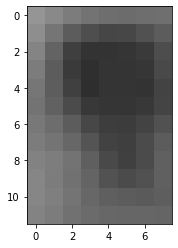

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content/drive/MyDrive/images')
print (items)    

for each_image in items:
  if each_image.endswith(".PNG"):
    print (each_image)
    full_path = "/content/drive/MyDrive/images" + each_image
    print (full_path)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
#plt.colorbar()
plt.grid(False)

## Converting images to grayscales

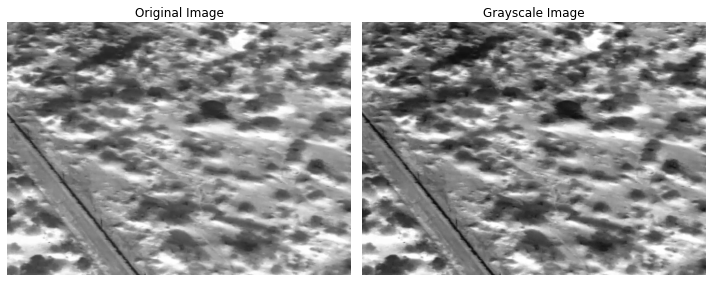

In [ ]:
import matplotlib.pyplot as plt

pic_name = '/content/drive/MyDrive/images/test/video82_1_000470.PNG'
image=plt.imread(pic_name)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #get the image

#fig=plt.figure(figsize=(10,5))
#_=plt.imshow(image)
#_=plt.axis('off')

#show the clear image compare to the origin

plt.figure(figsize=(10,4))

#get the origin image
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

#get the image into rgb2gray scale format 
from skimage.color import rgb2gray
im_gray = rgb2gray(image)
plt.subplot(1,2,2)
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

## Coloring as much possible background that is 100% not the humans/objects we want to detect

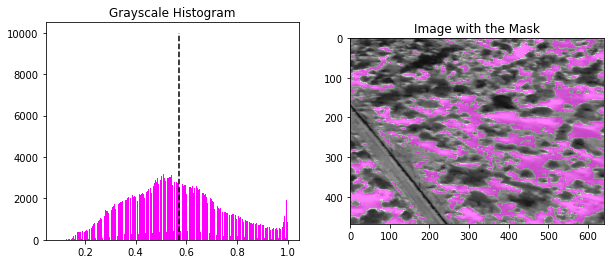

In [ ]:
#retrived from: https://www.kaggle.com/code/stkbailey/teaching-notebook-for-total-imaging-newbies
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1) #general stat approach to spot the mean and median to use as separetion value

#make plots
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
im_pixels = im_gray.flatten()
plt.hist(im_pixels,bins=267,color='magenta')
plt.vlines(0.57, 0, 10000, linestyle='--')
#plt.ylim([0,50000])
plt.title('Grayscale Histogram') #origin

# @markdown the genreal perception of using a mask is the assumtion that there is two classes: object and background, in our example the object is the human and background is the savanna. That's where the mask comes by, like that is separents the background data, then simply counts the objects left (hopefully the human silhouette)
#image with a mask 
plt.subplot(1,2,2)
mask_for_display = np.where(mask, mask, np.nan)
plt.imshow(im_gray, cmap='gray')
plt.imshow(mask_for_display, cmap='spring', alpha=0.5)
#plt.axis('off')
plt.title('Image with the Mask')

plt.show()

## Pre processsing of images and displaying results. 

In [ ]:
#pip install scikit-image

In [ ]:
import skimage
from skimage.filters import try_all_threshold

# perform automatic thresholding
t = skimage.filters.threshold_otsu(im_gray)
print("Found automatic threshold t = {}.".format(t)) #optimal value for the gray scale

Found automatic threshold t = 0.5788602828979492.


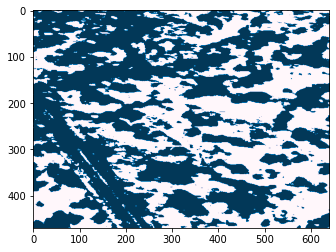

In [ ]:
# create a binary mask with the threshold found by Otsu's method
binary_mask = im_gray > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="PuBu_r")
plt.show() #shows the threshold on the white background 

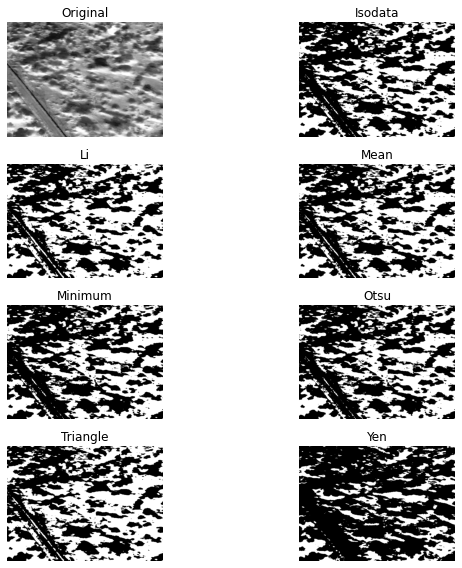

In [ ]:
#the rest of the levels for the threshold
fig, ax = try_all_threshold(im_gray, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
from scipy import ndimage
labels, nlabels = ndimage.label(mask)

label_arrays = []
for label_num in range(1, nlabels+1):
    label_mask = np.where(labels == label_num, 1, 0)
    label_arrays.append(label_mask)

print('There are {} separate components / objects detected.'.format(nlabels)) #most likely has been marked the theritories

There are 331 separate components / objects detected.


In [ ]:
from scipy import ndimage


for label_ind, label_coords in enumerate(ndimage.find_objects(labels)):
    cell = im_gray[label_coords]
    
     #Check if the label size is too small
    if np.product(cell.shape) < 10: 
       print('Label {} is too small! Setting to 0.'.format(label_ind))
       mask = np.where(labels==label_ind+1, 0, mask)

# Regenerate the labels
labels, nlabels = ndimage.label(mask)
print('There are now {} separate components / objects detected.'.format(nlabels))

Label 4 is too small! Setting to 0.
Label 9 is too small! Setting to 0.
Label 11 is too small! Setting to 0.
Label 13 is too small! Setting to 0.
Label 15 is too small! Setting to 0.
Label 16 is too small! Setting to 0.
Label 17 is too small! Setting to 0.
Label 18 is too small! Setting to 0.
Label 20 is too small! Setting to 0.
Label 22 is too small! Setting to 0.
Label 23 is too small! Setting to 0.
Label 24 is too small! Setting to 0.
Label 30 is too small! Setting to 0.
Label 31 is too small! Setting to 0.
Label 32 is too small! Setting to 0.
Label 33 is too small! Setting to 0.
Label 34 is too small! Setting to 0.
Label 37 is too small! Setting to 0.
Label 41 is too small! Setting to 0.
Label 42 is too small! Setting to 0.
Label 43 is too small! Setting to 0.
Label 44 is too small! Setting to 0.
Label 45 is too small! Setting to 0.
Label 46 is too small! Setting to 0.
Label 50 is too small! Setting to 0.
Label 53 is too small! Setting to 0.
Label 60 is too small! Setting to 0.
Lab

## Showing cropped images

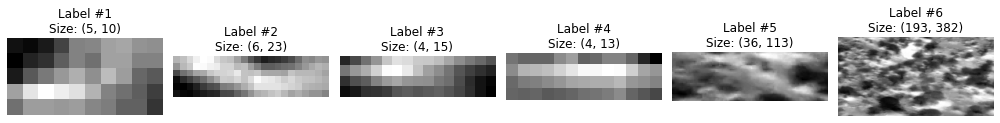

In [ ]:
#@markdown check upon the sizes (so far 6th is the best option)
fig, axes = plt.subplots(1,6, figsize=(14,8))

for ii, obj_indices in enumerate(ndimage.find_objects(labels)[0:6]):
    cell = im_gray[obj_indices]
    axes[ii].imshow(cell, cmap='gray')
    axes[ii].axis('off')
    axes[ii].set_title('Label #{}\nSize: {}'.format(ii+1, cell.shape))

plt.tight_layout()
plt.show()

In [ ]:
singleFile = ImagesRemovedErrors.cropped_image_file[0]

import os
imagePath = '/content/data/CroppedImages/train/' + singleFile 
if os.path.exists(imagePath):
  img = cv2.imread(imagePath)
else:
  print("Path does not exist:", imagePath)

Path does not exist: /content/data/CroppedImages/train/video53_2_000916-0.png


In [ ]:
imagePath

'/content/data/CroppedImages/train/video53_2_000916-0.png'

## Creating subset directory for Detecto for faster training due to time limitation

In [ ]:
!pip3 install labelImg    # Download LabelImg using pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 247 kB 5.1 MB/s 
     |████████████████████████████████| 8.4 MB 43.9 MB/s 
     |████████████████████████████████| 344 kB 27.4 MB/s 
     |████████████████████████████████| 59.9 MB 88 kB/s 
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261544 sha256=82a96ca27250f89d088faea2693790809b448049cdc2f03e9fe1c4a45ca02aaa
  Stored in directory: /root/.cache/pip/wheels/6e/83/14/df9548a7a658185c419c9bb21eeae66b13307c28881a37e151
Successfully built labelImg


In [ ]:
!pip3 install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

print(torch.cuda.is_available())

True


In [ ]:
os.mkdir("/content/data/XML1000")

In [ ]:
import shutil
import tqdm
i=0
## Loop throught the image directory of the XML files
for files in os.listdir("/content/data/XML"):
  ## Loop until the 300th file is reached
  if i < 300:
    ## Select Original File Location Directory
    oldDir = os.path.join("/content/data/XML",files)
    ## Select New file Location Directory
    newDir = os.path.join("/content/data/XML1000",files)
    ## Copy specified File
    shutil.copy(oldDir,newDir)
    i=i+1
  else:
    ## Exit the loop on the 300th File
    break;


## Downloading and training Detecto model on the custom Poacher dataset

In [ ]:
from detecto import core, utils, visualize
from detecto.core import DataLoader, Model,Dataset
dataset = Dataset('/content/data/XML1000', '/content/drive/MyDrive/images/train')

model = core.Model(['Human'])
loader = DataLoader(dataset, batch_size=8, shuffle=True)
model.fit(loader, verbose=True, epochs=3)
# model.fit(dataset, learning_rate=0.1, lr_step_size=32, epochs=5)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 3
Begin iterating over training dataset


100%|██████████| 38/38 [01:20<00:00,  2.11s/it]


Epoch 2 of 3
Begin iterating over training dataset


100%|██████████| 38/38 [01:19<00:00,  2.08s/it]


Epoch 3 of 3
Begin iterating over training dataset


100%|██████████| 38/38 [01:21<00:00,  2.14s/it]


In [ ]:
from detecto.utils import read_image
from detecto.visualize import show_labeled_image

image = read_image('/content/drive/MyDrive/images/test/video82_1_000470.PNG')
labels, boxes, scores = model.predict(image)
testingshit =show_labeled_image(image, boxes, labels)
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AAA/your_save_file.pth')

## Detecting poachers using the trained model of Detecto

In [ ]:
from detecto.visualize import plot_prediction_grid, detect_video, detect_live
detect_video(model, '/content/drive/MyDrive/AAA/testall.mp4', '/content/drive/MyDrive/AAA/your_output_file.avi')

## Downloading and Training of YoloV5 SMALL on custom poacher dataset 

In [ ]:
# Download yolo5 and install its dependencies
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 12270, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 12270 (delta 5), reused 9 (delta 1), pack-reused 12250
Receiving objects: 100% (12270/12270), 12.02 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (8491/8491), done.
     |████████████████████████████████| 596 kB 5.2 MB/s 


In [ ]:
%cd C:/Users/shane/OneDrive/Documents/PoacherData/Labeled data/yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5 # go inside yolov5 directory
%pip install -qr requirements.txt # install dependencies

# install important packages for the model
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12270, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 12270 (delta 5), reused 9 (delta 1), pack-reused 12250
Receiving objects: 100% (12270/12270), 12.02 MiB | 27.85 MiB/s, done.
Resolving deltas: 100% (8491/8491), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.1 MB/s 
     |████████████████████████████████| 145 kB 5.4 MB/s 
     |████████████████████████████████| 178 kB 40.8 MB/s 
     |████████████████████████████████| 1.1 MB 48.5 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 138 kB 61.5 MB/s 
     |████████████████████████████████| 62 kB 995 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-col

## Training of YoloV5 MEDIUM on custom poacher dataset 

In [ ]:
# Call the train method for the model, for the data we will provide a txt file that will point to both the training and validation data.
!python train.py --img 640 --batch 16 --epochs 7 --data /content/drive/MyDrive/dataset.txt --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/dataset.txt, hyp=data/hyps/hyp.scratch-low.yaml, epochs=7, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.